In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/An introduction to statistical analysis/Chapter 3/data/Carseats.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
df.nunique()

,0
Sales,336
CompPrice,73
Income,98
Advertising,28
Population,275
Price,101
ShelveLoc,3
Age,56
Education,9
Urban,2


In [ ]:
df.isna().sum()

,0
Sales,0
CompPrice,0
Income,0
Advertising,0
Population,0
Price,0
ShelveLoc,0
Age,0
Education,0
Urban,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
le = LabelEncoder()
for col in df.select_dtypes('object'):
    df[col] = le.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 34.5 KB


In [ ]:
y = df['Sales']
X = df.drop('Sales', axis = 1)

X = sm.add_constant(X)

model_full = sm.OLS(y, X).fit()

model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     52.33
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           6.94e-66
Time:                        02:10:16   Log-Likelihood:                -811.89
No. Observations:                 400   AIC:                             1646.
Df Residuals:                     389   BIC:                             1690.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.9961      1.103      6.342      0.000       4.827       9.165
CompPrice       0.0935      0.008     12.300      0.000       0.079       0.108
Income          0.0141      0.003      4.185      0.000       0.008       0.021
Advertising     0.1294      0.020      6.348      0.000       0.089       0.169
Population   2.584e-05      0.001      0.038      0.970      -0.001       0.001
Price          -0.0926      0.005    -18.926      0.000      -0.102      -0.083
ShelveLoc       0.6039      0.113      5.329      0.000       0.381       0.827
Age            -0.0467      0.006     -7.999      0.000      -0.058      -0.035
Education      -0.0391      0.036     -1.082      0.280      -0.110       0.032
Urban          -0.0800      0.207     -0.387      0.699      -0.486       0.326
US             -0.0035      0.274     -0.013      0.990      -0.543       0.536
==============================================================================
Omnibus:                       30.446   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.020
Skew:                           0.730   Prob(JB):                     1.51e-08
Kurtosis:                       2.831   Cond. No.                     4.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
formula = 'Sales ~ CompPrice + Income + Advertising + Price + C(ShelveLoc) + Age'

model_simp = smf.ols(formula = formula, data = df).fit()
model_simp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     381.4
Date:                Tue, 07 Jan 2025   Prob (F-statistic):          1.25e-170
Time:                        02:10:16   Log-Likelihood:                -571.24
No. Observations:                 400   AIC:                             1158.
Df Residuals:                     392   BIC:                             1190.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.4752      0.505     10.842      0.000       4.482       6.468
C(ShelveLoc)[T.1]     4.8357      0.152     31.710      0.000       4.536       5.135
C(ShelveLoc)[T.2]     1.9520      0.125     15.569      0.000       1.706       2.198
CompPrice             0.0926      0.004     22.451      0.000       0.084       0.101
Income                0.0158      0.002      8.590      0.000       0.012       0.019
Advertising           0.1159      0.008     15.006      0.000       0.101       0.131
Price                -0.0953      0.003    -35.699      0.000      -0.101      -0.090
Age                  -0.0461      0.003    -14.521      0.000      -0.052      -0.040
==============================================================================
Omnibus:                        0.766   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.682   Jarque-Bera (JB):                0.810
Skew:                           0.104   Prob(JB):                        0.667
Kurtosis:                       2.929   Cond. No.                     1.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Interpretation of Coefficients

Intercept: 5.47 when all other vars equals 0.

ShelveLocT1 (4.836): Theres a 4.836 sales increase in the units comparing T3

ShelveLocT2 (1.952): Theres a 1.952 sales increase in the units comparing T3

CompPrice (0.0926): Sales increase by 0.093 units per $1 (scaled depending on the metric being used in the dataset) increase in competitor's price.

Income (0.016): Sales increase by 0.016 units per $1,000 increase in income

Advertising (0.116): Sales increase by 0.116 units per $1,000 spent on advertising

Price (-0.095): Sales decrease by 0.095 units per $1 increase in price

Age (-0.046): Sales decrease by 0.046 units per year increase in customer age



In [ ]:
def t_student_residuals(df, model, alpha = 0.05, return_observations = False):

    df1 = df.copy()
    sample_size = df.shape[0]
    num_x = len(model.params) - 1

    influence = model.get_influence()
    residuals = influence.resid_studentized_external

    t_lims = stats.t.ppf(1-alpha / 2, df = sample_size - num_x - 2)

    lower_lim = t_lims * -1
    upper_lim = t_lims

    df1['t_residuals'] = residuals
    df1['outlier'] = (df1['t_residuals'] > upper_lim) | (df1['t_residuals'] < lower_lim)

    plt.figure(figsize=(10,6))
    plt.scatter(x = range(len(df1)), y=df1['t_residuals'], label = 't_residuals', color = 'blue', alpha=0.75)
    outlier = df1[df1['outlier']]
    plt.scatter(x=outlier.index, y=outlier['t_residuals'], color='red', label='Outliers', alpha=0.85)


    plt.axhline(y=upper_lim, color = 'salmon', linestyle='--', label =f'upper limit:{upper_lim:.2f}')
    plt.axhline(y=lower_lim, color = 'pink', linestyle='--', label =f'lower limit:{lower_lim:.2f}')

    plt.title('T-student residuals plot', fontsize=16)
    plt.xlabel('observations index', fontsize=12)
    plt.ylabel('t-residual', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()

    if return_observations:
        outliers = df1[df1['outlier']]
        return outliers


def leverage_measure(df, model, return_observations = False):
    df1 = df.copy()
    num_x = len(model.params) - 1
    sample_size = df.shape[0]
    limit = 3 * (num_x + 1)/sample_size

    influence = model.get_influence()
    leverage = influence.hat_matrix_diag
    df1['leverage'] = leverage
    df1['high_leverage'] = leverage > limit

    plt.figure(figsize=(10, 6))
    plt.scatter(x = range(len(df1)), y = df1['leverage'], label='Leverage', color='blue', alpha=0.7)
    high_leverage_points = df1[df1['high_leverage']]
    plt.scatter(x = high_leverage_points.index, y = high_leverage_points['leverage'],
                color='red', label='High Leverage Points', alpha=0.9)

    plt.axhline(y=limit, color='green', linestyle='--', label=f'Umbral ({limit:.2f})')

    plt.title('Leverage Plot', fontsize=16)
    plt.xlabel('Observation Index', fontsize=12)
    plt.ylabel('Leverage', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()

    if return_observations:
        high_leverage_records = df1[df1['high_leverage']]
        return high_leverage_points



def cooks_distance(df, model, return_observations = False):
    df1 = df.copy()
    influence = model.get_influence()
    cooks_distance, _ = influence.cooks_distance
    sample_size = n = df1.shape[0]
    num_x = k = len(model.params) - 1
    umbral = 4/n

    df1['cooks_distance'] = cooks_distance
    df1['high_cook_distance'] = cooks_distance > umbral


    plt.figure(figsize = (10, 8))
    plt.scatter(x = range(len(df1)), y = df1['cooks_distance'], color = 'blue', label = f'cooks distance', alpha = 0.75)
    plt.axhline(y = umbral, label = f'umbral: {umbral:.2f}', linestyle = '--', color='salmon')
    influential_point = df1[df1['high_cook_distance']]
    plt.scatter(x = influential_point.index, y = influential_point['cooks_distance'], color = 'red', label = f'Influential data point', alpha = 0.75)

    plt.title('Cooks Distance Plot for Influential Points')
    plt.xlabel('Observation Index')
    plt.ylabel('Cooks Distance')
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()
    if return_observations:
        return influential_point

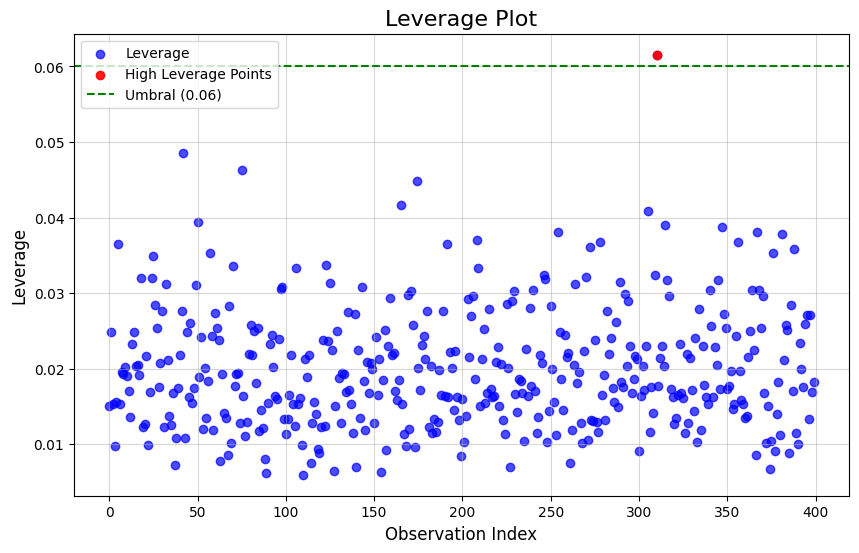

In [ ]:
leverage_measure(df, model_simp)

This plot tell us the outlier point in terms of X of this subject without taking in consideration the objective variable.

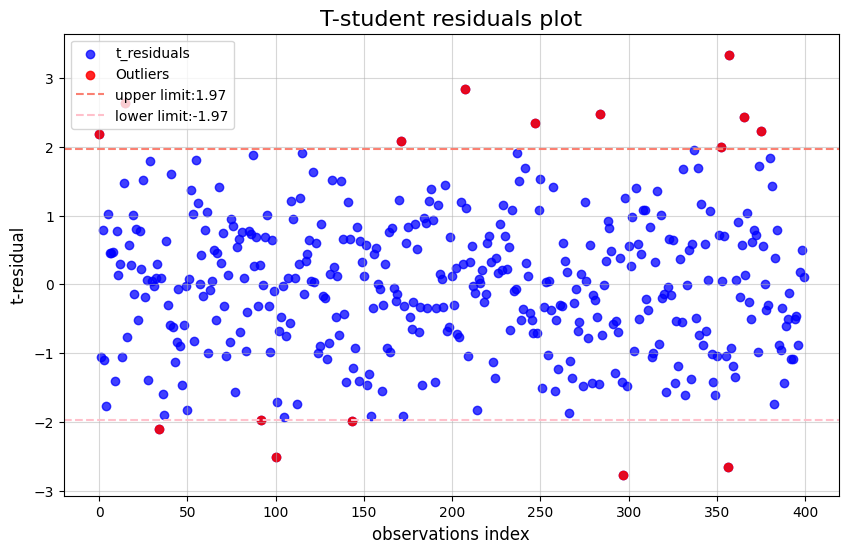

In [ ]:
t_student_residuals(df, model_simp)

Here we can see theres a considerable amount of outliers in our data, more than 15 points which the variability is way of. We can also see that the residuals are distributed randomly across the space.

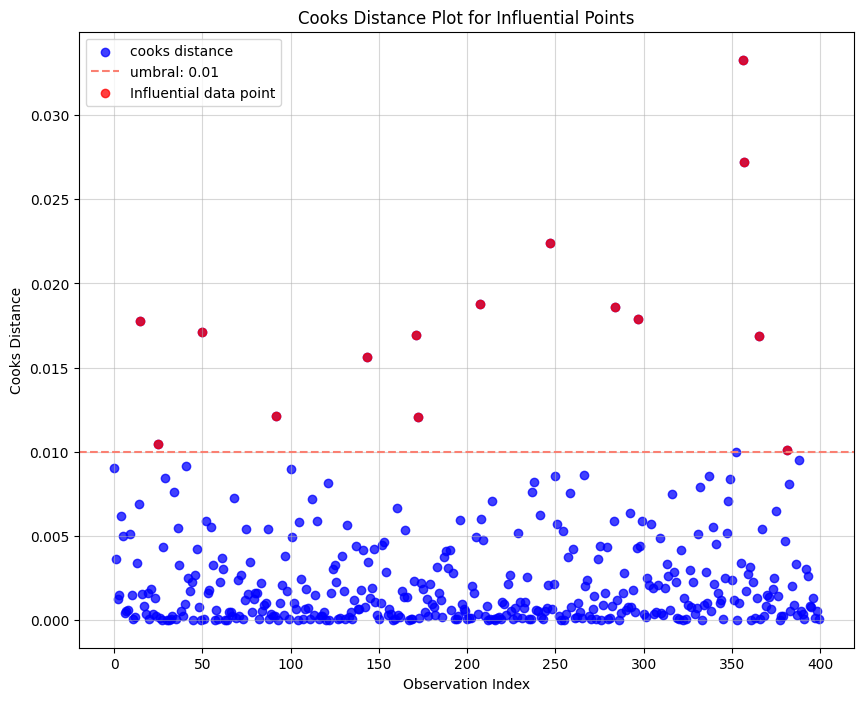

In [ ]:
cooks_distance(df, model_simp)

Using a not rigorous statistical approach we can see that theres some observations which are making the linear model to fit in an not optimal way. We can also see that theres a lot of observations which are high influential and outliers at the same time.

In [ ]:
import random
np.random.seed(2025)
X = np.random.randn(100)
y = 2 * X + np.random.rand(100)

random_model = sm.OLS(y, X).fit()

random_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.897
Method:                 Least Squares   F-statistic:                              868.5
Date:                Tue, 07 Jan 2025   Prob (F-statistic):                    8.31e-51
Time:                        02:10:21   Log-Likelihood:                         -90.566
No. Observations:                 100   AIC:                                      183.1
Df Residuals:                      99   BIC:                                      185.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.8904      0.064     29.471      0.000       1.763       2.018
==============================================================================
Omnibus:                        5.425   Durbin-Watson:                   0.483
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                2.607
Skew:                          -0.062   Prob(JB):                        0.272
Kurtosis:                       2.219   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

coefficient: 1.8904 increment of y when we make a unitary addition to the X

std error: 0.064 a really small value compared to the 1.89 which means the coefficient is stable.

t-statistic: is a really small value which means its very unlikely that the relationship is non significative.

${R^2}$: the equation is able to explain 0.898 porcent of the variance of Y, which means super strong correlation.



In [ ]:
import random
np.random.seed(2025)
X = np.random.randn(100)
y = 2 * X + np.random.rand(100)

random_model = sm.OLS(X, y).fit()

random_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.897
Method:                 Least Squares   F-statistic:                              868.5
Date:                Tue, 07 Jan 2025   Prob (F-statistic):                    8.31e-51
Time:                        02:10:21   Log-Likelihood:                         -21.491
No. Observations:                 100   AIC:                                      44.98
Df Residuals:                      99   BIC:                                      47.59
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4749      0.016     29.471      0.000       0.443       0.507
==============================================================================
Omnibus:                        5.040   Durbin-Watson:                   0.454
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                3.485
Skew:                           0.303   Prob(JB):                        0.175
Kurtosis:                       2.316   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

coefficient: 0.4749 which means theres a increment of 0.4749 units when y is incremented by 1.

std error: a really small error

t-statistic: super small p-value.

$R^2$: Same correlation

In [ ]:
model = sm.OLS(y, X).fit()
n = 100
beta_hat = model.params[0]
t_stat_model = model.tvalues[0]

numerator = np.sqrt(n - 1) * np.sum(X * y)
denominator = np.sqrt((np.sum(X ** 2)* np.sum(y ** 2)) - (np.sum(X * y)**2))
t_stat_manual = numerator / denominator

# Mostrar los resultados
print(f"Coeficiente estimado (beta_hat): {beta_hat}")
print(f"t-Estadístico (modelo): {t_stat_model}")
print(f"t-Estadístico (manual): {t_stat_manual}")

Coeficiente estimado (beta_hat): 1.890388551472605
t-Estadístico (modelo): 29.4708471520038
t-Estadístico (manual): 29.470847152003795


In [ ]:
model = sm.OLS(X, y).fit()
n = 100
beta_hat = model.params[0]
t_stat_model = model.tvalues[0]

numerator = np.sqrt(n - 1) * np.sum(X * y)
denominator = np.sqrt((np.sum(X ** 2)* np.sum(y ** 2)) - (np.sum(X * y)**2))
t_stat_manual = numerator / denominator

# Mostrar los resultados
print(f"Coeficiente estimado (beta_hat): {beta_hat}")
print(f"t-Estadístico (modelo): {t_stat_model}")
print(f"t-Estadístico (manual): {t_stat_manual}")

Coeficiente estimado (beta_hat): 0.4748641112258427
t-Estadístico (modelo): 29.470847152003802
t-Estadístico (manual): 29.470847152003795


In [ ]:
X = np.random.randn(100)
y = 2 * X + np.random.rand(100)
y = sm.add_constant(y)
model = sm.OLS(X, y).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     4468.
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           1.46e-83
Time:                        02:10:22   Log-Likelihood:                 57.564
No. Observations:                 100   AIC:                            -111.1
Df Residuals:                      98   BIC:                            -105.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2105      0.014    -14.623      0.000      -0.239      -0.182
x1             0.4844      0.007     66.842      0.000       0.470       0.499
==============================================================================
Omnibus:                       16.133   Durbin-Watson:                   2.423
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.926
Skew:                          -0.321   Prob(JB):                       0.0517
Kurtosis:                       1.995   Cond. No.                         2.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X = np.random.randn(100)
y = 2 * X + np.random.rand(100)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4258.
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           1.46e-82
Time:                        02:10:22   Log-Likelihood:                -18.497
No. Observations:                 100   AIC:                             40.99
Df Residuals:                      98   BIC:                             46.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4693      0.029     15.942      0.000       0.411       0.528
x1             1.9421      0.030     65.252      0.000       1.883       2.001
==============================================================================
Omnibus:                       25.552   Durbin-Watson:                   2.410
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.053
Skew:                           0.206   Prob(JB):                       0.0485
Kurtosis:                       1.867   Cond. No.                         1.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Recall that the coefficient estimate ˆ β forthelinearregressionof
 Y onto X without an intercept is given by (3.38). Under what
 circumstance is the coefficient estimate for the regression of X
 onto Y the same as the coefficient estimate for the regression of
 Y onto X?

 Its only impossible only when the variances of X and Y are the same and the correlation of X & Y == 1 or -1. It can be seen as:


 sum($X_iY_i)$ $/X_i^2$$  ==  $sum($Y_iX_i)$/$Y_i^2$

In [ ]:
n = 100
X = np.random.normal(0, 1, n)
y = 3 * X + np.random.normal(0, 2, n)

model_y_on_X = sm.OLS(y, X).fit()
beta_y_on_X = model_y_on_X.params[0]


model_X_on_y = sm.OLS(X, y).fit()
beta_X_on_y = model_X_on_y.params[0]


print(f"Beta (Y onto X): {beta_y_on_X}")
print(f"Beta (X onto Y): {beta_X_on_y}")





Beta (Y onto X): 2.9658082892270325
Beta (X onto Y): 0.22088496807384533


In [ ]:

n = 100
X = np.random.normal(0, 1, n)
y = 2 * X


X_scaled = (X - np.mean(X)) / np.std(X)  #make the variance equal to each other
y_scaled = (y - np.mean(y)) / np.std(y)

model_y_on_x = sm.OLS(y_scaled, X_scaled).fit()
beta_y_on_x = model_y_on_x.params[0]

# Regresión de X sobre Y escalado
model_x_on_y = sm.OLS(X_scaled, y_scaled).fit()
beta_x_on_y = model_x_on_y.params[0]

# Print results
print(f"Beta (Y onto X): {beta_y_on_x}")
print(f"Beta (X onto Y): {beta_x_on_y}")


Beta (Y onto X): 1.0
Beta (X onto Y): 1.0


In [ ]:
np.random.seed(1)
n  = 100
X = np.random.normal(0,1, n)
X_intercept = sm.add_constant(X)
eps = np.random.normal(0, np.sqrt(0.25), 100)
y = -1 + 0.5 * X + eps


print(f"Longitud del vector y: {len(y)}")


model_intercept= sm.OLS(y, X_intercept).fit()
print(model_intercept.summary())
print(f"Coeficientes de la regresión (β0, β1): {model.params}")


Longitud del vector y: 100
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           2.20e-17
Time:                        02:10:22   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9265    

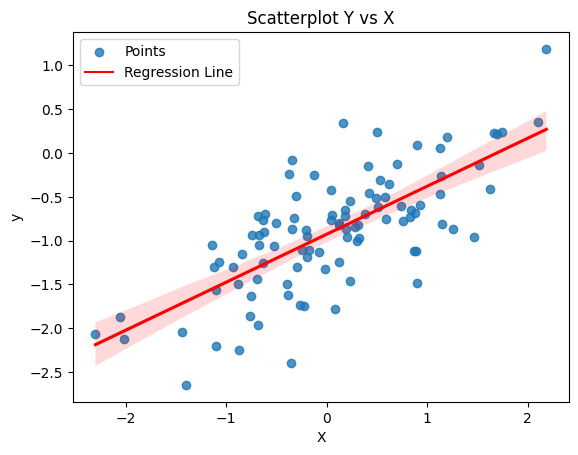

In [ ]:
sns.regplot(x = X, y = y, line_kws = {'color': 'red'},  label = f'Points')
plt.title('Scatterplot Y vs X')
plt.xlabel('X')
plt.ylabel('y')
plt.plot([], [], color='red', label='Regression Line')
plt.legend()
plt.show()


theres a linear relationship with a upper trend with a clearly random noise

In [ ]:
X_squared = X ** 2
X_poly = np.column_stack((X_intercept, X_squared))
poly_model = sm.OLS(y, X_poly).fit()
print(poly_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     52.96
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           2.83e-16
Time:                        02:10:25   Log-Likelihood:                -65.107
No. Observations:                 100   AIC:                             136.2
Df Residuals:                      97   BIC:                             144.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9325      0.058    -16.158      0.0

its doesnt upgrade the quality of our predictions becouse its already a good model but the variance without explication its just the irreducible variance due to the high noise in the data.


In [ ]:
np.random.seed(1)
n  = 100
X = np.random.normal(0,1, n)
X_intercept = sm.add_constant(X)
eps = np.random.normal(0, 0.05, 100)
y = -1 + 0.5 * X + eps


print(f"Longitud del vector y: {len(y)}")


model_intercept= sm.OLS(y, X_intercept).fit()
print(model_intercept.summary())
print(f"Coeficientes de la regresión (β0, β1): {model_intercept.params}")


Longitud del vector y: 100
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     9084.
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           1.97e-98
Time:                        02:10:25   Log-Likelihood:                 165.13
No. Observations:                 100   AIC:                            -326.3
Df Residuals:                      98   BIC:                            -321.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9926    

as supposed we can see now when we reduce the irreducible variance we get an almost perfect score.

In [ ]:
X_squared = X ** 2
X_poly = np.column_stack((X_intercept, X_squared))
poly_model = sm.OLS(y, X_poly).fit()
print(poly_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     4497.
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           2.32e-96
Time:                        02:10:25   Log-Likelihood:                 165.15
No. Observations:                 100   AIC:                            -324.3
Df Residuals:                      97   BIC:                            -316.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9933      0.006   -172.106      0.0

same result, the only thing that stops our model to get the a perfect score is the irreducible bias set on a normal distribution with 0 mean and  0.05 std.

In [ ]:
np.random.seed(1)
n  = 100
X = np.random.normal(0,1, n)
X_intercept = sm.add_constant(X)
eps = np.random.normal(0, 100, 100)
y = -1 + 0.5 * X + eps


print(f"Longitud del vector y: {len(y)}")


model_intercept= sm.OLS(y, X_intercept).fit()
print(model_intercept.summary())
print(f"Coeficientes de la regresión (β0, β1): {model_intercept.params}")


Longitud del vector y: 100
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8989
Date:                Tue, 07 Jan 2025   Prob (F-statistic):              0.345
Time:                        02:10:25   Log-Likelihood:                -594.96
No. Observations:                 100   AIC:                             1194.
Df Residuals:                      98   BIC:                             1199.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7014    

In [ ]:
X_squared = X ** 2
X_poly = np.column_stack((X_intercept, X_squared))
poly_model = sm.OLS(y, X_poly).fit()
print(poly_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.4615
Date:                Tue, 07 Jan 2025   Prob (F-statistic):              0.632
Time:                        02:10:26   Log-Likelihood:                -594.94
No. Observations:                 100   AIC:                             1196.
Df Residuals:                      97   BIC:                             1204.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.4983     11.542      1.083      0.2

# **the same concept**

What are the confidence intervals for β0 and β1 based on the
 original data set, the noisier data set, and the less noisy data
 set? Comment on your results.


    R) When the variance is low the coefficients are stable with a low std err and a narrow range in the confidence
    intervals. When the opposite happens the std increments and the ranges are lot more wider.


In [ ]:
random.seed(1)
N = 100
X1 = np.random.uniform(0, 1, N)
X2 = 0.5*X1 + np.random.normal(0, 0.1, N)/10
y = 2 + 2 * X1 + 0.3 * X2 + np.random.normal(0, 1, N) # Equation I


the form of y is: $β_0 + β_1X_1 +  β_2X_2 + ϵ$

where ϵ corresponds to the noise sum on the equation I


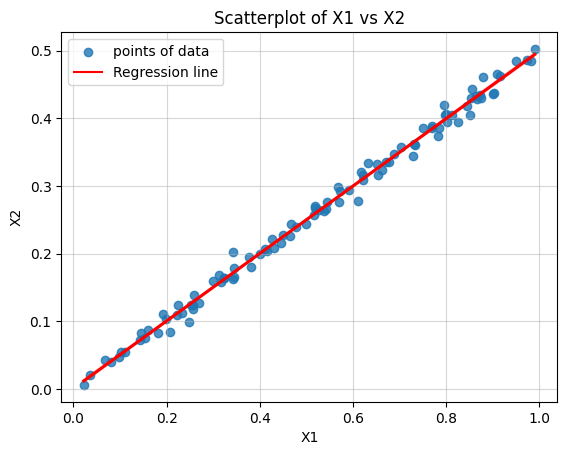

In [ ]:
sns.regplot(x = X1, y = X2, label = 'points of data', line_kws = {'color': 'red'})
plt.plot([], [], color = 'red', label = 'Regression line')
plt.title('Scatterplot of X1 vs X2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(alpha = 0.5)
plt.show()


these variables are super correlated with each other following a linear relationship.

In [ ]:
X = np.column_stack((X1, X2))
X = sm.add_constant(X)
multi_model = sm.OLS(y, X).fit()
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     16.53
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           6.63e-07
Time:                        02:15:48   Log-Likelihood:                -143.63
No. Observations:                 100   AIC:                             293.3
Df Residuals:                      97   BIC:                             301.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9352      0.219      8.835      0.0

c = The coefficients of $\beta_1$ & $\beta_2$ are innestable due to the fact that the std error es bigger than the coefficient itself in both cases. Also we can see that the confidence interval is really wide in comparation of the value of the coeefficients which means theres lot of uncertability. Lastly we see that in both escenarios the coefficients are not significative.

For the intercept we see the opposite escenario, with good values in all the aspects mentioned in x1 & x2.




d =

In [ ]:
X_d = X1
X_d = sm.add_constant(X_d)
model_x1 = sm.OLS(y, X_d).fit()
print(model_x1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     32.50
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           1.26e-07
Time:                        02:22:46   Log-Likelihood:                -143.98
No. Observations:                 100   AIC:                             292.0
Df Residuals:                      98   BIC:                             297.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9611      0.216      9.063      0.0

D = Now we can see that all the problems of the previous case are fixed, the std error is low, p-values tells us the var x1 is significative and the confidence intervals are narrow.

In [ ]:
X_e = X2
X_e = sm.add_constant(X_e)
model_x2 = sm.OLS(y, X_e).fit()
print(model_x2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     33.17
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           9.72e-08
Time:                        02:25:22   Log-Likelihood:                -143.72
No. Observations:                 100   AIC:                             291.4
Df Residuals:                      98   BIC:                             296.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9427      0.217      8.937      0.0

same result, we could expect this output becouse first we checked the relationship of x1 vs x2 and we conclude it was a strong linear relation.

In [ ]:
X1 = np.append(X1, 0.1)
X2 = np.append(X2, 0.8)
y = np.append(y, 6)
x_mult = np.column_stack((X1, X2))
x_mult = sm.add_constant(x_mult)

multi_model = sm.OLS(y, x_mult).fit()

print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     33.49
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           6.98e-12
Time:                        02:30:22   Log-Likelihood:                -147.40
No. Observations:                 104   AIC:                             300.8
Df Residuals:                     101   BIC:                             308.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9444      0.213      9.120      0.0

In [ ]:
X_d = X1
X_d = sm.add_constant(X_d)
model_x1 = sm.OLS(y, X_d).fit()
print(model_x1.summary())
X_e = X2
X_e = sm.add_constant(X_e)
model_x2 = sm.OLS(y, X_e).fit()
print(model_x2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     10.64
Date:                Tue, 07 Jan 2025   Prob (F-statistic):            0.00150
Time:                        02:31:36   Log-Likelihood:                -168.69
No. Observations:                 104   AIC:                             341.4
Df Residuals:                     102   BIC:                             346.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4662      0.245     10.082      0.0

g = Now we can see that when the high leverage point was added to X2 the line got a better fit and stablish as significant the var x2 even when we had multicolineality.